In [16]:
import pandas as pd
import numpy as np
import mysql.connector

import warnings
warnings.filterwarnings('ignore')

In [15]:
# Install necessary libraries using pip in a separate cell
!pip install mysql-connector-python pandas sqlalchemy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 40.4 MB/s eta 0:00:00


In [17]:
HOST =  '18.136.157.135'
USER = 'dm_team3'
PASSWORD =  'DM!$!Team!27@9!20&'
DATABASE =  'project_telecom'
TABLE_NAME = 'telecom_churn_data'

# connecting with the database to fetch the dataset

In [18]:
# Establishing Connection
try:
    conn = mysql.connector.connect(
        host=HOST,
        user=USER,
        password=PASSWORD,
        database=DATABASE
    )

    # SQL Query
    query = f"SELECT * FROM {TABLE_NAME};"

    # Fetch Data into Pandas DataFrame
    df = df1 = pd.read_sql(query, conn)

    # Close Connection
    conn.close()

    print("Data successfully fetched!")
    print(df.head())  # Display first few rows

except Exception as e:
    print("Error:", e)

Data successfully fetched!
  columns1 columns2 columns3   columns4 columns5 columns6 columns7 columns8  \
0       KS      128      415   382-4657       no      yes       25    265.1   
1       OH      107      415   371-7191       no      yes       26    161.6   
2       NJ      137      415   358-1921       no       no        0    243.4   
3       OH       84      408   375-9999      yes       no        0    299.4   
4       OK       75      415   330-6626      yes       no        0    166.7   

  columns9 columns10 columns11 columns12 columns13 columns14 columns15  \
0      110     45.07     197.4        99     16.78     244.7        91   
1      123     27.47     195.5       103     16.62     254.4       103   
2      114     41.38     121.2       110      10.3     162.6       104   
3       71      50.9      61.9        88      5.26     196.9        89   
4      113     28.34     148.3       122     12.61     186.9       121   

  columns16 columns17 columns18 columns19 columns20 c

In [19]:
pd.set_option('display.max_columns', None)
df.head()

,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,columns11,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


2. Exploring the Dataset


In [20]:
df.info()

# from the info, all the data are in object dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   columns1   4617 non-null   object
 1   columns2   4617 non-null   object
 2   columns3   4617 non-null   object
 3   columns4   4617 non-null   object
 4   columns5   4617 non-null   object
 5   columns6   4617 non-null   object
 6   columns7   4617 non-null   object
 7   columns8   4617 non-null   object
 8   columns9   4617 non-null   object
 9   columns10  4617 non-null   object
 10  columns11  4617 non-null   object
 11  columns12  4617 non-null   object
 12  columns13  4617 non-null   object
 13  columns14  4617 non-null   object
 14  columns15  4617 non-null   object
 15  columns16  4617 non-null   object
 16  columns17  4617 non-null   object
 17  columns18  4617 non-null   object
 18  columns19  4617 non-null   object
 19  columns20  4617 non-null   object
 20  columns21  4617 non-null   obj

In [21]:
df.columns = [
    "State", "Account Length", "Area Code", "Phone", "International Plan", "VMail Plan",
    "VMail Message", "Day Mins", "Day Calls", "Day Charge", "Eve Mins", "Eve Calls",
    "Eve Charge", "Night Mins", "Night Calls", "Night Charge", "International Mins",
    "International Calls", "International Charge", "CustServ Calls", "Churn"
]

In [22]:
numeric_columns = [ "Account Length", "Area Code",
    "VMail Message", "Day Mins", "Day Calls", "Day Charge", "Eve Mins", "Eve Calls",
    "Eve Charge", "Night Mins", "Night Calls", "Night Charge", "International Mins",
    "International Calls", "International Charge", "CustServ Calls"]


In [23]:
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

In [24]:
df['Churn'] = df['Churn'].astype(str).str.strip().str.strip('.')
df['Churn'] = df['Churn'].map({'False': 0, 'True': 1})

In [25]:
categorical_columns = ['State','International Plan','VMail Plan']

df[categorical_columns] = df[categorical_columns].astype('category')

# numerical and categorical features seperated and converted to their respective dtypes

In [26]:
df.sample(10)

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn
2695,WI,72,408,383-9448,no,no,0,179.9,113,30.58,149.8,112,12.73,168.2,79,7.57,9.8,7,2.65,2,0
208,MD,106,510,408-4142,no,no,0,213.9,95,36.36,151.9,70,12.91,260.1,124,11.70,12.2,5,3.29,3,0
1402,NE,70,415,421-8535,no,no,0,213.4,86,36.28,204.7,77,17.40,256.6,101,11.55,5.7,4,1.54,1,0
583,ME,165,408,350-2012,no,no,0,150.5,75,25.59,193.1,93,16.41,311.6,93,14.02,10.3,2,2.78,1,0
3155,IL,123,408,337-3932,no,no,0,114.8,94,19.52,150.0,104,12.75,268.6,119,12.09,9.6,4,2.59,2,0
387,NH,54,510,353-3351,no,no,0,210.5,102,35.79,204.5,83,17.38,127.8,53,5.75,8.5,5,2.30,1,0
368,KS,132,415,369-3214,no,no,0,83.4,110,14.18,232.2,137,19.74,146.7,114,6.60,7.6,5,2.05,1,0
3412,NJ,113,408,402-8337,yes,no,0,122.4,98,20.81,223.8,116,19.02,267.5,148,12.04,11.6,5,3.13,3,0
3624,CT,88,415,355-1130,no,no,0,168.8,141,28.70,211.5,129,17.98,86.9,92,3.91,10.5,7,2.84,3,0
1636,MN,65,510,354-8491,no,yes,29,158.1,104,26.88,322.2,81,27.39,210.0,96,9.45,8.9,6,2.40,1,0


In [27]:
df.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,437.046350,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035,0.142084
std,39.597194,42.288212,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019,0.349174
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000,0.000000
50%,100.000000,415.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   State                 4617 non-null   category
 1   Account Length        4617 non-null   int64   
 2   Area Code             4617 non-null   int64   
 3   Phone                 4617 non-null   object  
 4   International Plan    4617 non-null   category
 5   VMail Plan            4617 non-null   category
 6   VMail Message         4617 non-null   int64   
 7   Day Mins              4617 non-null   float64 
 8   Day Calls             4617 non-null   int64   
 9   Day Charge            4617 non-null   float64 
 10  Eve Mins              4617 non-null   float64 
 11  Eve Calls             4617 non-null   int64   
 12  Eve Charge            4617 non-null   float64 
 13  Night Mins            4617 non-null   float64 
 14  Night Calls           4617 non-null   int64   
 15  Nigh

# **from the description**
1. Account Length - It represent the no. of months a particular customer using the service. It ranges from 1 to 243 months and the average is 100 months.
2. Vmail Message - No. of voicemail messages stored for a customer. It ranges from 0 to max of 51 with    average   7.8 messages.
3. Day Mins - Total no. of usage in minutes. It ranges from 0 to max of 351minutes. Average minutes is 53
4. Day Calls - Call per day made by the customers. The average calls per day is 100 rangeing from 0 to max of 165 calls per day
5. Day Charge - The amount charged by the telecom company per day. Te average amount charged per day is
30rangingfrom0tomaxof59.76
6. Eve Mins - Total no. of usage in the evening time in minutes. The average value is 200minutes ranging from 0 to 356minutes
7. Eve calls - Total no. of calls made during evening  time. It ranges from 0 to 170 calls with average 100 calls
8. Eve Charge - Charge billed by the telecom company for the evening usage per customer. It ranges from 0 to
30withaverage17
9. Night Mins - Total no. of usage in the night time in minutes. The average value is 200minutes ranging from 23.2mins to 395 minutes
10. Night calls - Total no. of calls made during night time. It ranges from 12 to 175 calls with average 99.9 calls
11. Night Charge - Charge billed by the telecom company for the night usage per customer. It ranges from 1 to 17 with 9 as average
12. International Minutes - Total minutes the customer has spent on international calls. It ranges from 0 to 20 mins with average of 10.2minutes
13. International Calls - Total International calls made by the customers. It ranges from 0 to 20 calls with average of 4.4 calls
14. International Charges - The amount billed for the international calls. It ranges 0 to 5 with average of 2.7
15. CustServ Calls - Indicated the total no. of times the customer has called the customer service. It ranges from 1 to 9 times with average of 1.5 times per customer.

In [29]:
df.describe(include = ('category'))

# description for categorical features

,State,International Plan,VMail Plan
count,4617,4617,4617
unique,51,2,2
top,WV,no,no
freq,149,4171,3381


1. State - Location. The network is used in 51 stated and it is mostly used in West Virginia with 149 customers.
2. International Plan - INdicated the international plan activation status of the customer.
3. Vmail Plan - It indicates the Voice mail activation status of the customers.
4. Churn - This is the target varibale. It indicates if the customer using the service or not. True indicates that customer has left the service, False indicates the customer is still using the service. 3961 customers are using the service.

# **3. Preprocessing**
1. Null Check
2. Duplicate check
3. removing Phone and Area Code column as it serves no purpose in the analysis

In [30]:
df.isnull().sum()

#no null values in the dataset

,0
State,0
Account Length,0
Area Code,0
Phone,0
International Plan,0
VMail Plan,0
VMail Message,0
Day Mins,0
Day Calls,0
Day Charge,0


In [31]:
df['Churn'].value_counts(normalize=True) * 100

,proportion
Churn,
0,85.79164
1,14.20836


In [32]:
df.duplicated().sum()

# no duplicates in the dataset

np.int64(0)

In [33]:
df.drop(['Phone', 'Area Code'], axis = 1, inplace = True)

#dropping the 'Phone' featured as it has no use in the analysis.

# **4. Feature Engineering**

Creating new feature for total_charge, total_calls, total_mins

In [34]:
# Creating new feature total_charge, total_calls and total_callmins

df['total_charge'] = df[['Day Charge','Eve Charge','Night Charge','International Charge']].sum(axis = 1)
df['total_calls'] = df[['Day Calls','Eve Calls','Night Calls','International Calls']].sum(axis = 1)
df['total_mins'] = df[['Day Mins','Eve Mins','Night Mins','International Mins']].sum(axis = 1)

In [35]:
df.head()

,State,Account Length,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn,total_charge,total_calls,total_mins
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,75.56,303,717.2
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,59.24,332,625.2
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,62.29,333,539.4
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,66.80,255,564.8
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,52.09,359,512.0


# **5. EDA**

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [37]:
# checking mean values for all the features w.r.to churn and non churn customers

df.groupby('Churn').mean(numeric_only=True)
# From the result, it is obvious that customers who left the service has given a good business when compared to the customers who are using the service.


,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,total_charge,total_calls,total_mins
Churn,,,,,,,,,,,,,,,,,,
0,100.354456,8.385761,176.000252,99.922747,29.920624,198.638425,100.16410,16.884509,199.734158,99.998233,8.988147,10.206665,4.479677,2.756319,1.455693,58.549599,304.564756,584.579500
1,102.400915,4.614329,207.298018,100.849085,35.241098,211.241311,100.27439,17.955671,205.996494,99.617378,9.269939,10.717835,4.157012,2.894314,2.239329,65.361021,304.897866,635.253659


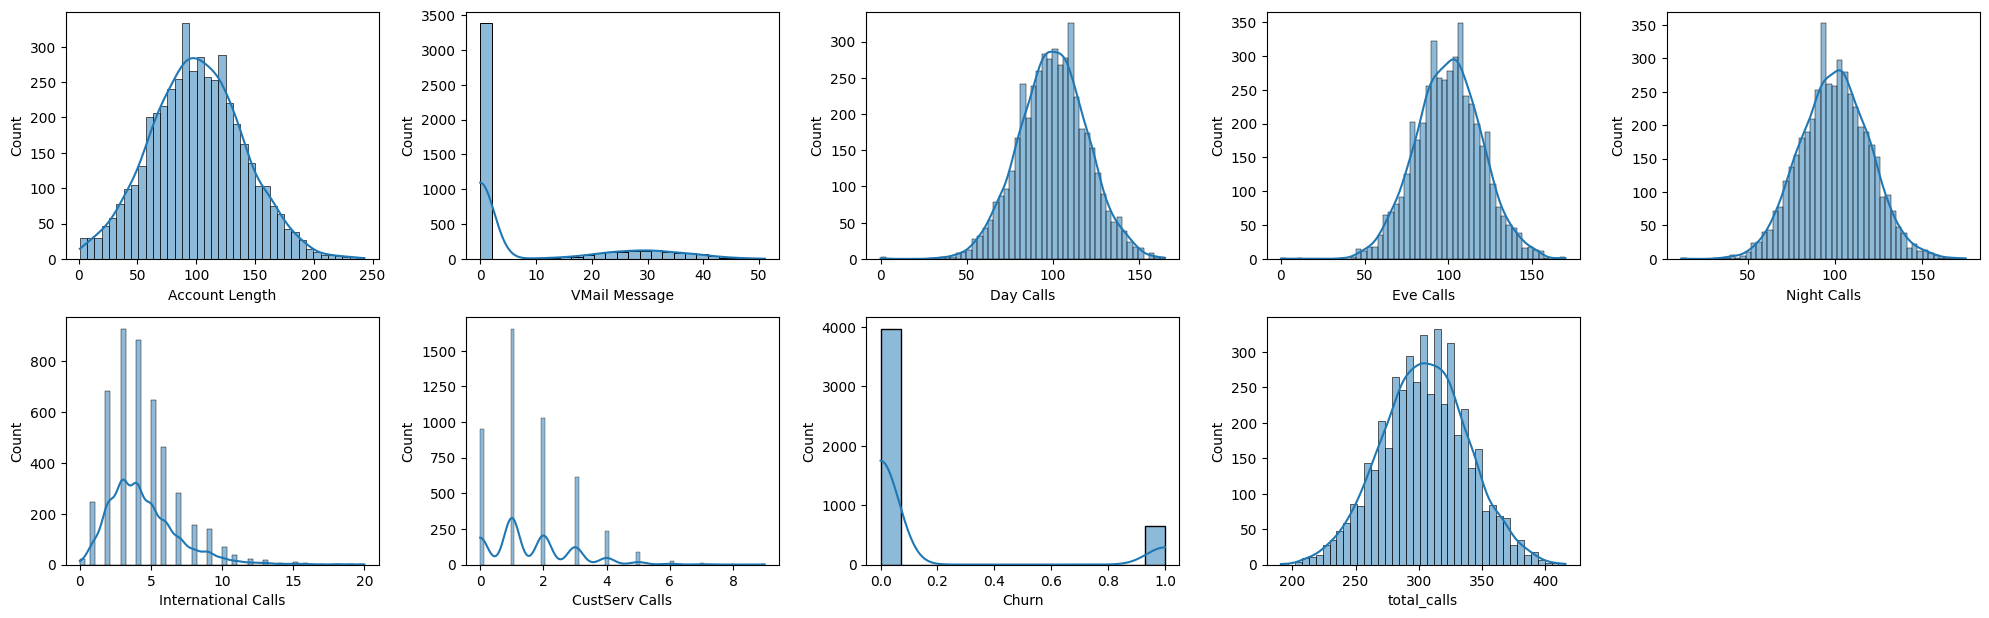

In [38]:
plt.figure(figsize=(20,15))
plotnumber = 1

for col in df.select_dtypes(include=['int']):
    plt.subplot(5,5,plotnumber)
    sns.histplot(data = df, x = col, kde = True)
    plotnumber = plotnumber + 1

plt.tight_layout()
plt.show()


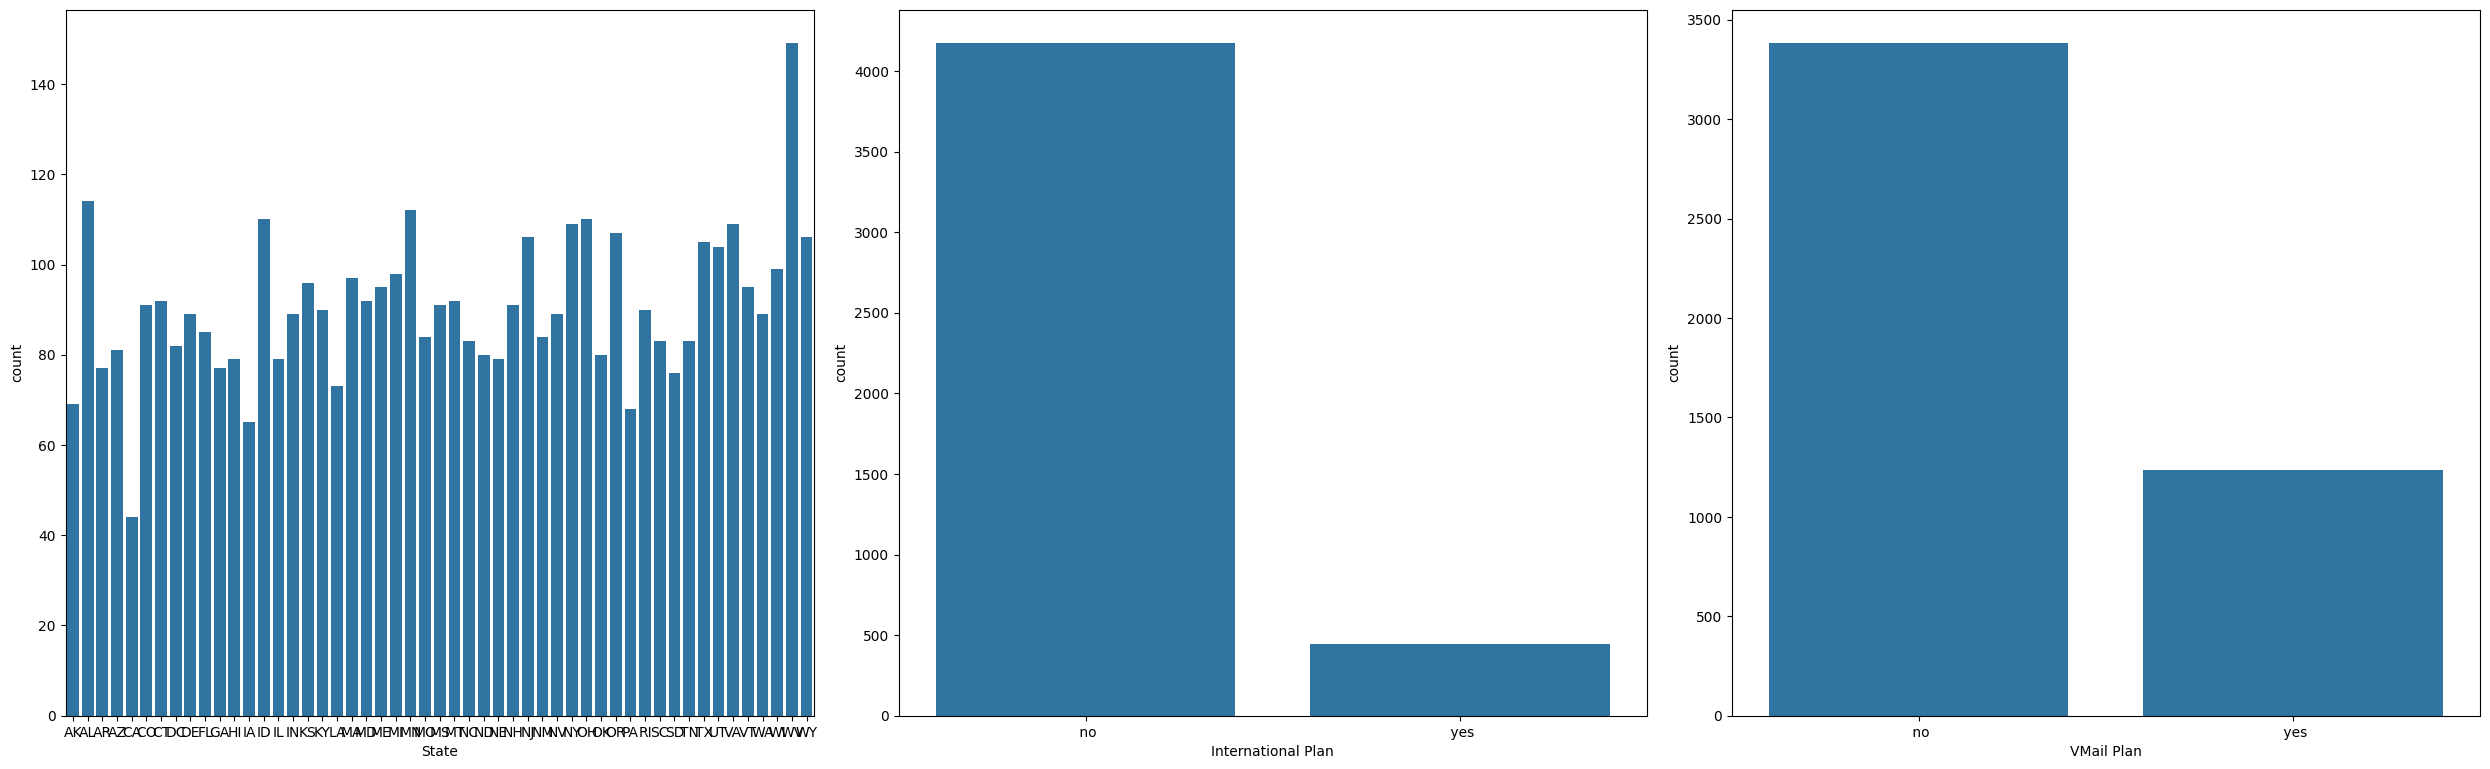

In [39]:
plt.figure(figsize=(25,15))
plotnumber = 1

for col in df.select_dtypes(include=['category']):
    plt.subplot(2,3,plotnumber)
    sns.countplot(data = df, x = col)
    plotnumber = plotnumber + 1

plt.tight_layout()
plt.show()

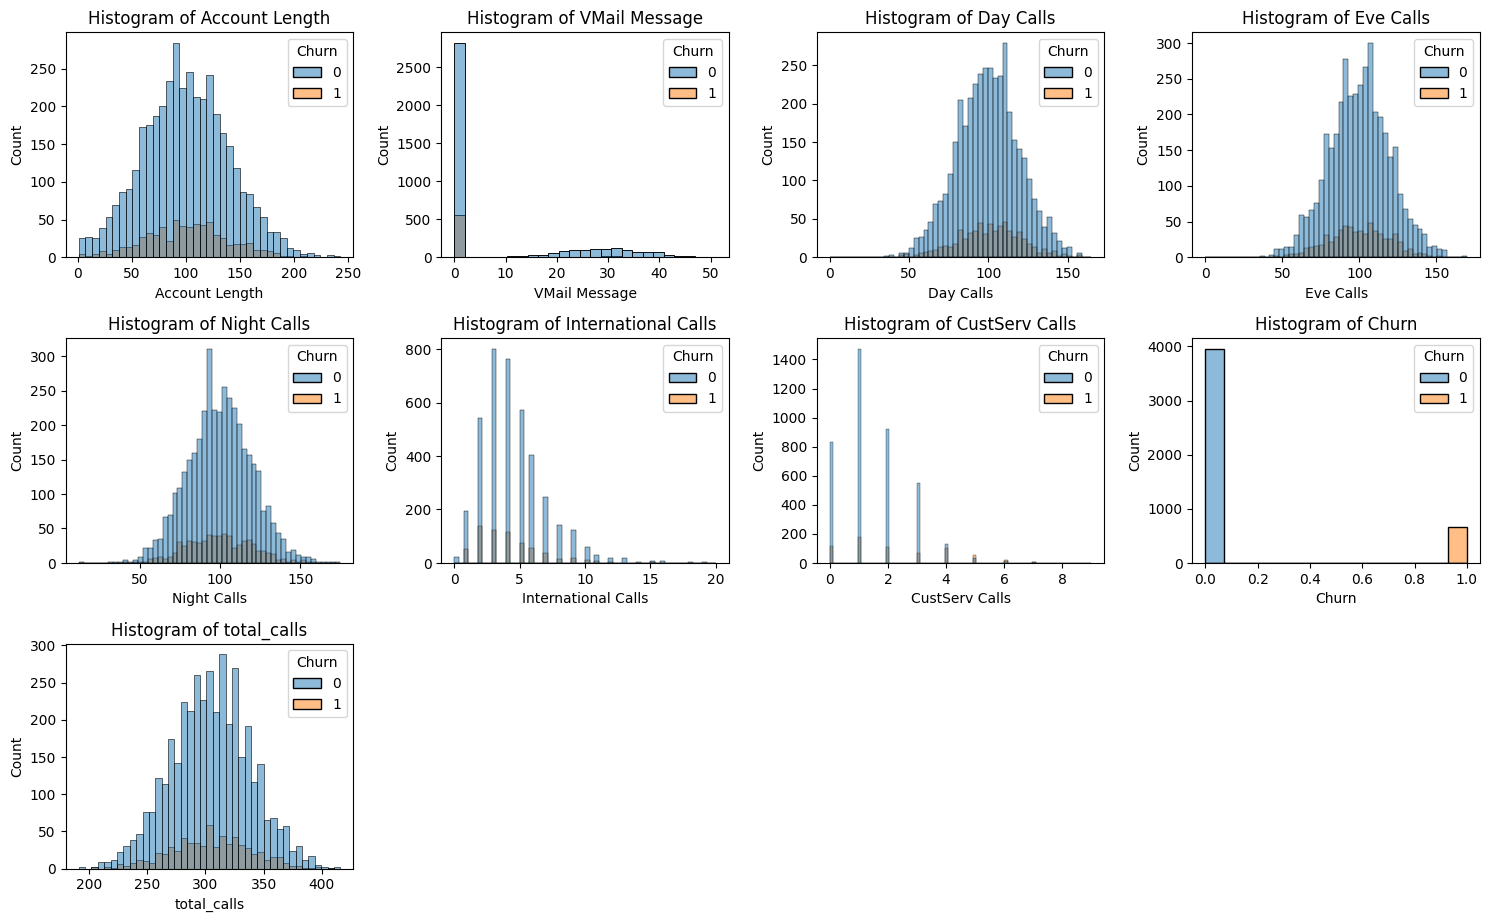

In [40]:
# Bivariate Analysis with Churn feature

plt.figure(figsize=(15,15))
plotnumber = 1

for col in df.select_dtypes(include=['int']):
    plt.subplot(5,4,plotnumber)
    sns.histplot(data = df, x = col, hue =  df['Churn'])
    plotnumber = plotnumber + 1
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

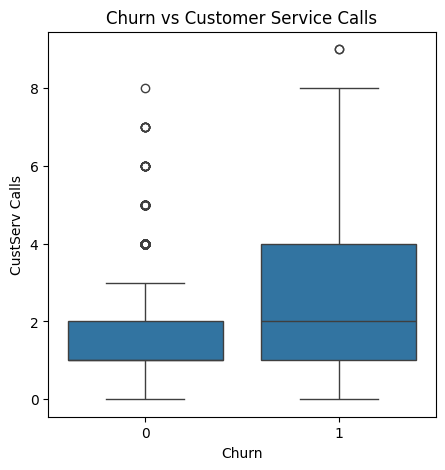

In [41]:
# Churn with CustServ Calls

plt. figure(figsize=(5,5))
sns.boxplot(data = df,x = 'Churn', y = 'CustServ Calls')
plt.title('Churn vs Customer Service Calls')
plt.show()

1. The graph shows Churned customers have called customer service more than Non Churn customers.
2. This shows level of non satisfaction of the churned customers.
3. Median of the churned customers making service call is 2. IQR range is 1 to  4.
4. Some customers has made 8+ calls before getting churned.
So, a high risk flag has to be raised if a customer is making 4th service call.

<Figure size 1000x500 with 0 Axes>

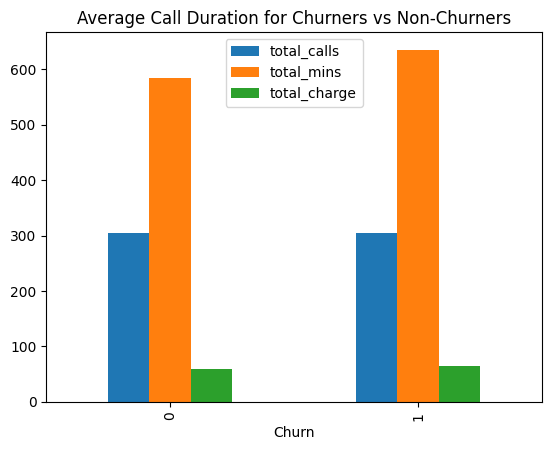

In [42]:
# Call Duration and Churn

plt.figure(figsize=(10, 5))
df.groupby('Churn')[['total_calls', 'total_mins', 'total_charge']].mean().plot(kind='bar')
plt.title('Average Call Duration for Churners vs Non-Churners')
plt.show()

From the Graph,

1. The Churned customers are using slightly more than non churn customers.
2. total call minutes used by the churned customers is higher than non churn customers.

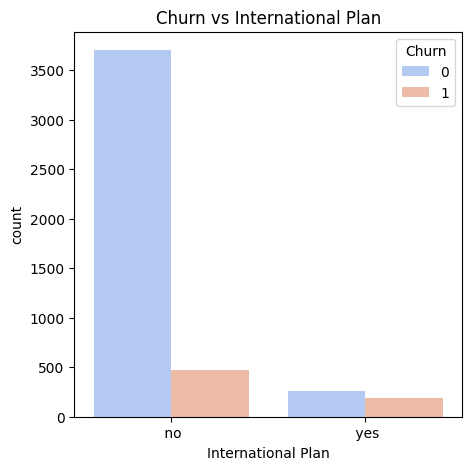

In [43]:
# International Plan and Churn

plt.figure(figsize=(5,5))
sns.countplot(data = df, x = 'International Plan', hue = 'Churn', palette = 'coolwarm')
plt.title('Churn vs International Plan')
plt.show()

From the Graph,

1. Majority of customers dont have international plan.
2. Number of customers churned is higher When compared with customers who have international plan.

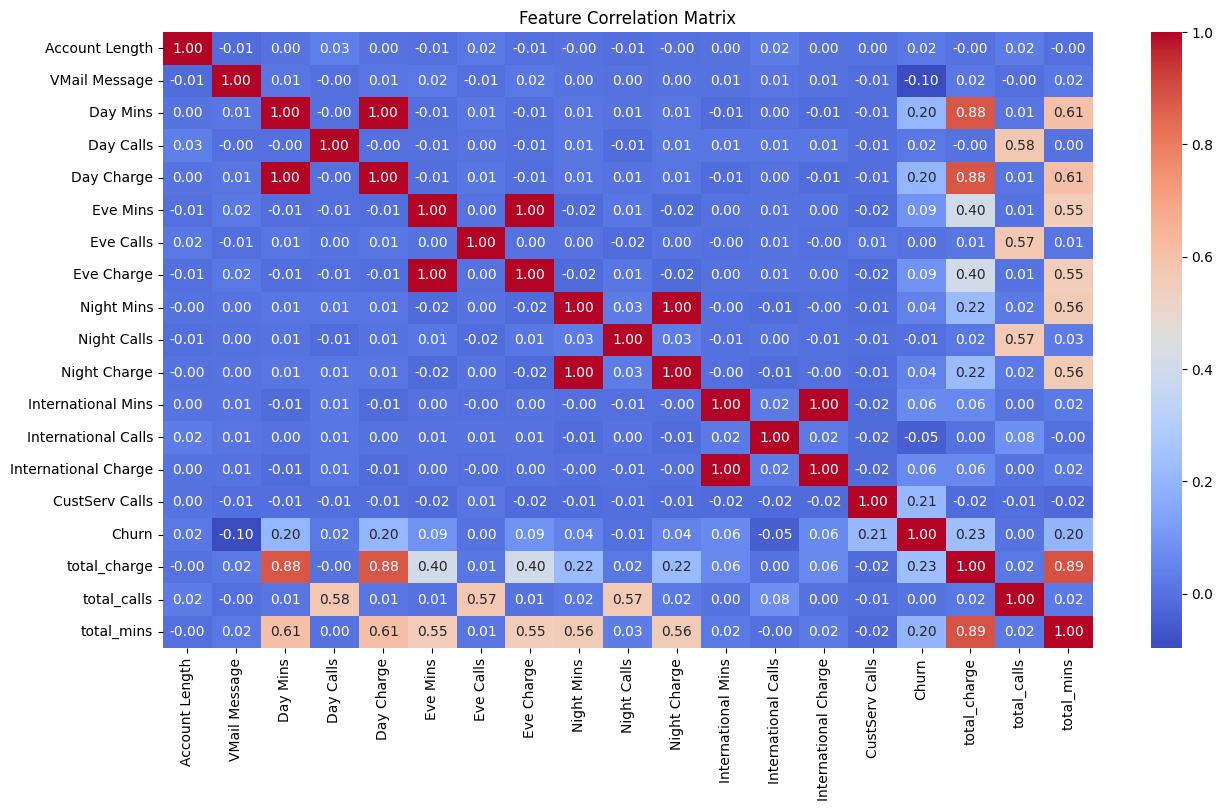

In [44]:
# Heatmap
df_num = df.select_dtypes(include=('number'))
plt.figure(figsize=(15, 8))
sns.heatmap(df_num.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

# **Churn vs State**

In [45]:
# Mean value of the Churn Feature

pivot_df = df.pivot_table(index='State', columns='Churn', values='Account Length', aggfunc='mean')
pivot_df.T

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,96.765625,97.730769,96.919355,103.972973,101.096774,96.185185,100.102564,103.643836,95.080000,111.931507,102.029851,103.837838,95.322034,98.298969,103.000000,99.171053,104.179487,96.909091,100.030303,96.433735,100.166667,97.441558,97.098765,99.62766,100.123288,103.093333,96.136986,101.535211,103.178082,99.315068,104.300000,104.049383,101.723684,101.819444,96.483516,101.168421,108.384615,101.900000,103.866667,100.759036,93.268657,104.78125,98.873239,98.641975,100.2500,106.689320,103.729412,98.558824,96.879121,97.37500,98.03125
1,120.400000,91.700000,99.066667,95.857143,101.230769,123.200000,90.214286,87.555556,104.714286,115.666667,98.100000,89.200000,85.000000,106.461538,96.428571,104.461538,98.666667,84.615385,107.714286,87.142857,110.500000,90.500000,115.823529,110.50000,111.909091,90.437500,103.263158,113.083333,126.142857,90.166667,108.545455,96.320000,108.250000,94.176471,118.722222,96.533333,93.800000,105.294118,97.250000,113.714286,108.437500,96.00000,96.916667,104.458333,102.9375,84.166667,105.300000,108.333333,107.000000,106.47619,107.00000


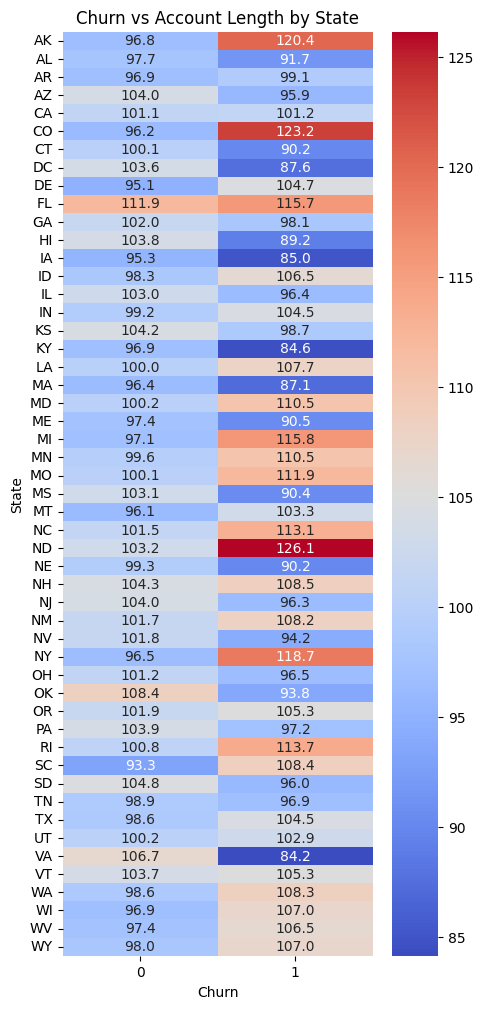

In [46]:
plt.figure(figsize=(5, 12))
sns.heatmap(pivot_df, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Churn vs Account Length by State")
plt.show()

1. The graph indicates the Account Length of the churn and non churned customers w.r.to States.
2. Some of the states have higher account length of churned customers, which means long term cutomers are leaving.
3. Some of the States, account length is low for churned customers, which means they leave early due to some issues.

In [47]:
# Checking Churn percentage of each states

State_Churn = df.groupby(['Churn','State']).size().unstack(fill_value=0).T
State_Churn.columns = ['No Churn','Churn']
State_Churn['Total'] = State_Churn['No Churn']+State_Churn['Churn']
State_Churn['Churn%'] = (State_Churn['Churn']/(State_Churn['Churn']+State_Churn['No Churn']) * 100 ).round(1)

State_Churn.T

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
No Churn,64.0,104.0,62.0,74.0,31.0,81.0,78.0,73.0,75.0,73.0,67.0,74.0,59.0,97.0,72.0,76.0,78.0,77.0,66.0,83.0,72.0,77.0,81.0,94.0,73.0,75.0,73.0,71.0,73.0,73.0,80.0,81.0,76.0,72.0,91.0,95.0,65.0,90.0,60.0,83.0,67.0,64.0,71.0,81.0,88.0,103.0,85.0,68.0,91.0,128.0,96.0
Churn,5.0,10.0,15.0,7.0,13.0,10.0,14.0,9.0,14.0,12.0,10.0,5.0,6.0,13.0,7.0,13.0,18.0,13.0,7.0,14.0,20.0,18.0,17.0,18.0,11.0,16.0,19.0,12.0,7.0,6.0,11.0,25.0,8.0,17.0,18.0,15.0,15.0,17.0,8.0,7.0,16.0,12.0,12.0,24.0,16.0,6.0,10.0,21.0,8.0,21.0,10.0
Total,69.0,114.0,77.0,81.0,44.0,91.0,92.0,82.0,89.0,85.0,77.0,79.0,65.0,110.0,79.0,89.0,96.0,90.0,73.0,97.0,92.0,95.0,98.0,112.0,84.0,91.0,92.0,83.0,80.0,79.0,91.0,106.0,84.0,89.0,109.0,110.0,80.0,107.0,68.0,90.0,83.0,76.0,83.0,105.0,104.0,109.0,95.0,89.0,99.0,149.0,106.0
Churn%,7.2,8.8,19.5,8.6,29.5,11.0,15.2,11.0,15.7,14.1,13.0,6.3,9.2,11.8,8.9,14.6,18.8,14.4,9.6,14.4,21.7,18.9,17.3,16.1,13.1,17.6,20.7,14.5,8.8,7.6,12.1,23.6,9.5,19.1,16.5,13.6,18.8,15.9,11.8,7.8,19.3,15.8,14.5,22.9,15.4,5.5,10.5,23.6,8.1,14.1,9.4


In [48]:
State_Churn = State_Churn.reset_index().rename(columns={'index': 'State'})

In [49]:
# Plotting Churn% geographically
import plotly.express as px

fig = px.choropleth(
    State_Churn,
    locations='State',
    locationmode='USA-states',
    color='Churn%',
    hover_name='State',
    hover_data=['No Churn', 'Churn', 'Total', 'Churn%'],
    color_continuous_scale='Blues',
    range_color=[0, 30],  # Set min and max churn % for color scale
    scope='usa',
    title='Churn Percentage by State',
    labels={'Churn%': 'Churn Percentage (%)'}
)

# Update layout with corrected 'framewidth'
fig.update_layout(
    title_text='Churn Percentage by State',
    geo=dict(framewidth=0),  # Corrected from 'showframewidth'
    width=1000,
    height=1000
)

# Show the plot
fig.show()

The Graph indicates the Churn percentage of each Staes in a geographical plot

# **Churn vs Total Charge**

In [50]:
df[['total_charge', 'Churn']].head()

,total_charge,Churn
0,75.56,0
1,59.24,0
2,62.29,0
3,66.80,0
4,52.09,0


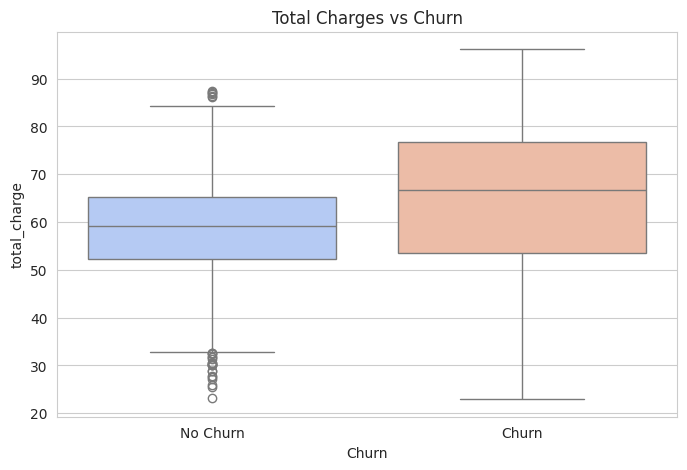

In [51]:
sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='total_charge', data=df, palette="coolwarm")
plt.title('Total Charges vs Churn')
plt.xticks([0,1],['No Churn','Churn'])

plt.show()

1. Churned customers have been charged more than non churned customers.
2. A risk flag should be raised when total charge is crossing the 65 dollars.

**Feature Importance**

Checking the correlation between the some numeircal features with the output feature

In [52]:
df.head()

,State,Account Length,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn,total_charge,total_calls,total_mins
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,75.56,303,717.2
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,59.24,332,625.2
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,62.29,333,539.4
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,66.80,255,564.8
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,52.09,359,512.0


In [53]:
numeric_cols = ['Account Length','VMail Message','Day Mins','Day Calls','Day Charge','Eve Mins','Eve Calls',
                'Eve Charge','Night Mins','Night Calls','Night Charge','International Mins','International Calls','International Charge',
                'CustServ Calls','total_charge', 'total_calls', 'total_mins']


churn_corr = df[numeric_cols + ['Churn']].corr()['Churn'].drop('Churn')  # Checking the correlation with 'Churn'

churn_corr

,Churn
Account Length,0.018046
VMail Message,-0.096884
Day Mins,0.202439
Day Calls,0.016268
Day Charge,0.202434
Eve Mins,0.087042
Eve Calls,0.001943
Eve Charge,0.087036
Night Mins,0.043262
Night Calls,-0.006671


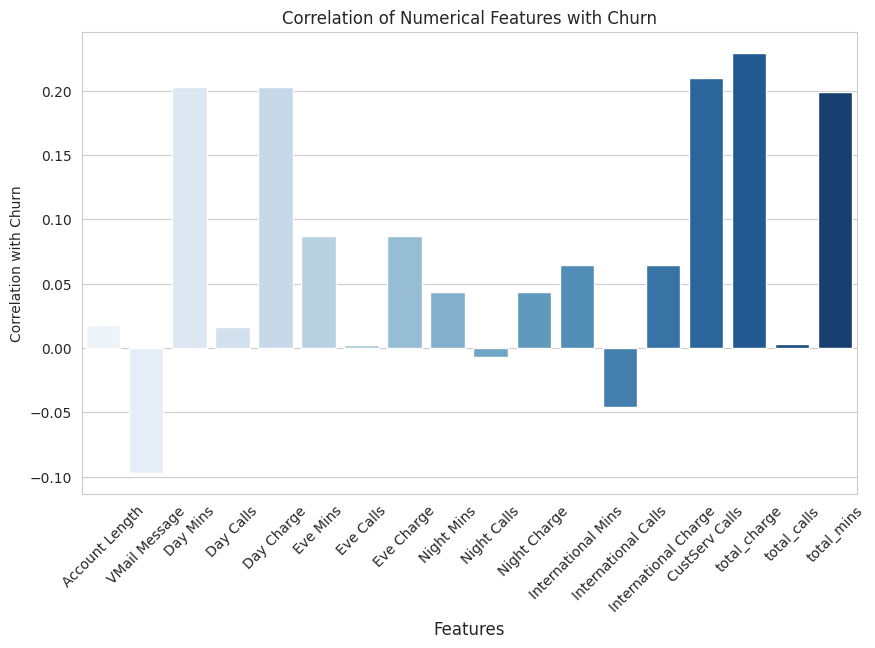

In [54]:
plt.figure(figsize=(10,6))
sns.barplot(x = churn_corr.index, y = churn_corr.values, palette = 'Blues')
plt.title('Correlation of Numerical Features with Churn')
plt.xlabel('Features', fontsize = 12)
plt.ylabel('Correlation with Churn')
plt.xticks(rotation = 45)
plt.show()

**The plot explains,**

1. total_charge and total_mins and Customer Serice calls show significantly higher relation to the churn.
2. The telecom company should focus on charge of their service, people who highly use their call service and the people who makes high number of Customer Service Calls.
3. Total calls is shows not much relation to the customer churn.
4. Account Length and churn are least related.
5. Vmail Messages and International calls are showing neagative values and inversely proportional to Churn, stating that increase in their decreses the Churn count.

In [55]:
# chi2 test for categorical features

from scipy.stats import chi2_contingency

categorical_cols = ['State','International Plan', 'VMail Plan']

for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['Churn'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"\nChi-Squared Test for {col} vs. Churn:")
    print(f"Chi-squared statistic: {chi2}")
    print(f"P-value: {p_value}")
    if p_value < 0.05:
        print(f"{col} is significantly associated with Churn (p < 0.05)")
    else:
        print(f"{col} is not significantly associated with Churn (p >= 0.05)")


Chi-Squared Test for State vs. Churn:
Chi-squared statistic: 90.77361165260449
P-value: 0.0003716382614441669
State is significantly associated with Churn (p < 0.05)

Chi-Squared Test for International Plan vs. Churn:
Chi-squared statistic: 303.70061781373795
P-value: 5.1469217589105615e-68
International Plan is significantly associated with Churn (p < 0.05)

Chi-Squared Test for VMail Plan vs. Churn:
Chi-squared statistic: 55.30697372040214
P-value: 1.0310215433169948e-13
VMail Plan is significantly associated with Churn (p < 0.05)


**from Chi2 values,**
1. State featue has very less statistics and p- value. It is not much related to the churn.
2. International Plan shows 303.7 as statistic value which is very high and may directly related to the churn. Customers with International plan may not enjoy the service which results in poor service and Churn. 3.Vmail plan has very less values for chi2 statistics and pvalue. It is less related to the customer churn.

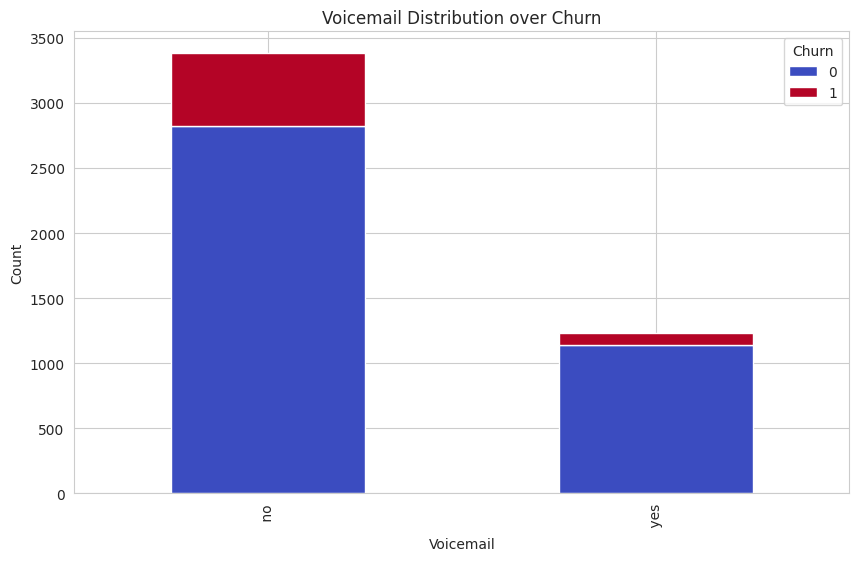

Churn          0    1
VMail Plan           
no          2822  559
yes         1139   97


In [56]:
vmail_churn = df.groupby(['VMail Plan','Churn']).size().unstack()

vmail_churn.plot(kind = 'bar', stacked = True, colormap = 'coolwarm', figsize = (10,6))

plt.title('Voicemail Distribution over Churn')
plt.xlabel('Voicemail')
plt.ylabel('Count')
plt.show()


print(vmail_churn)

**The plot indicates,**
1. customers who dont have voicemail plan tends to churn more.
2. Customers who have voicemail plan is highly engaged and churn is less when compared with customers who dont have voicemail plan.

# **Preprocessing**
1.Null and Duplicate Check
2. Handling outliers
3. Scaling
4. Encoding
5. Handling Imbalance
6. Drop irrelevant features

In [57]:
df1 = df

df1.head()

,State,Account Length,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn,total_charge,total_calls,total_mins
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,75.56,303,717.2
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,59.24,332,625.2
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,62.29,333,539.4
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,66.80,255,564.8
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,52.09,359,512.0


In [58]:
# 1. Null & Duplicate Checks

df.isnull().sum()

,0
State,0
Account Length,0
International Plan,0
VMail Plan,0
VMail Message,0
Day Mins,0
Day Calls,0
Day Charge,0
Eve Mins,0
Eve Calls,0


In [59]:
df.duplicated().sum()

np.int64(0)

**There are no null and duplicates in the dataset**

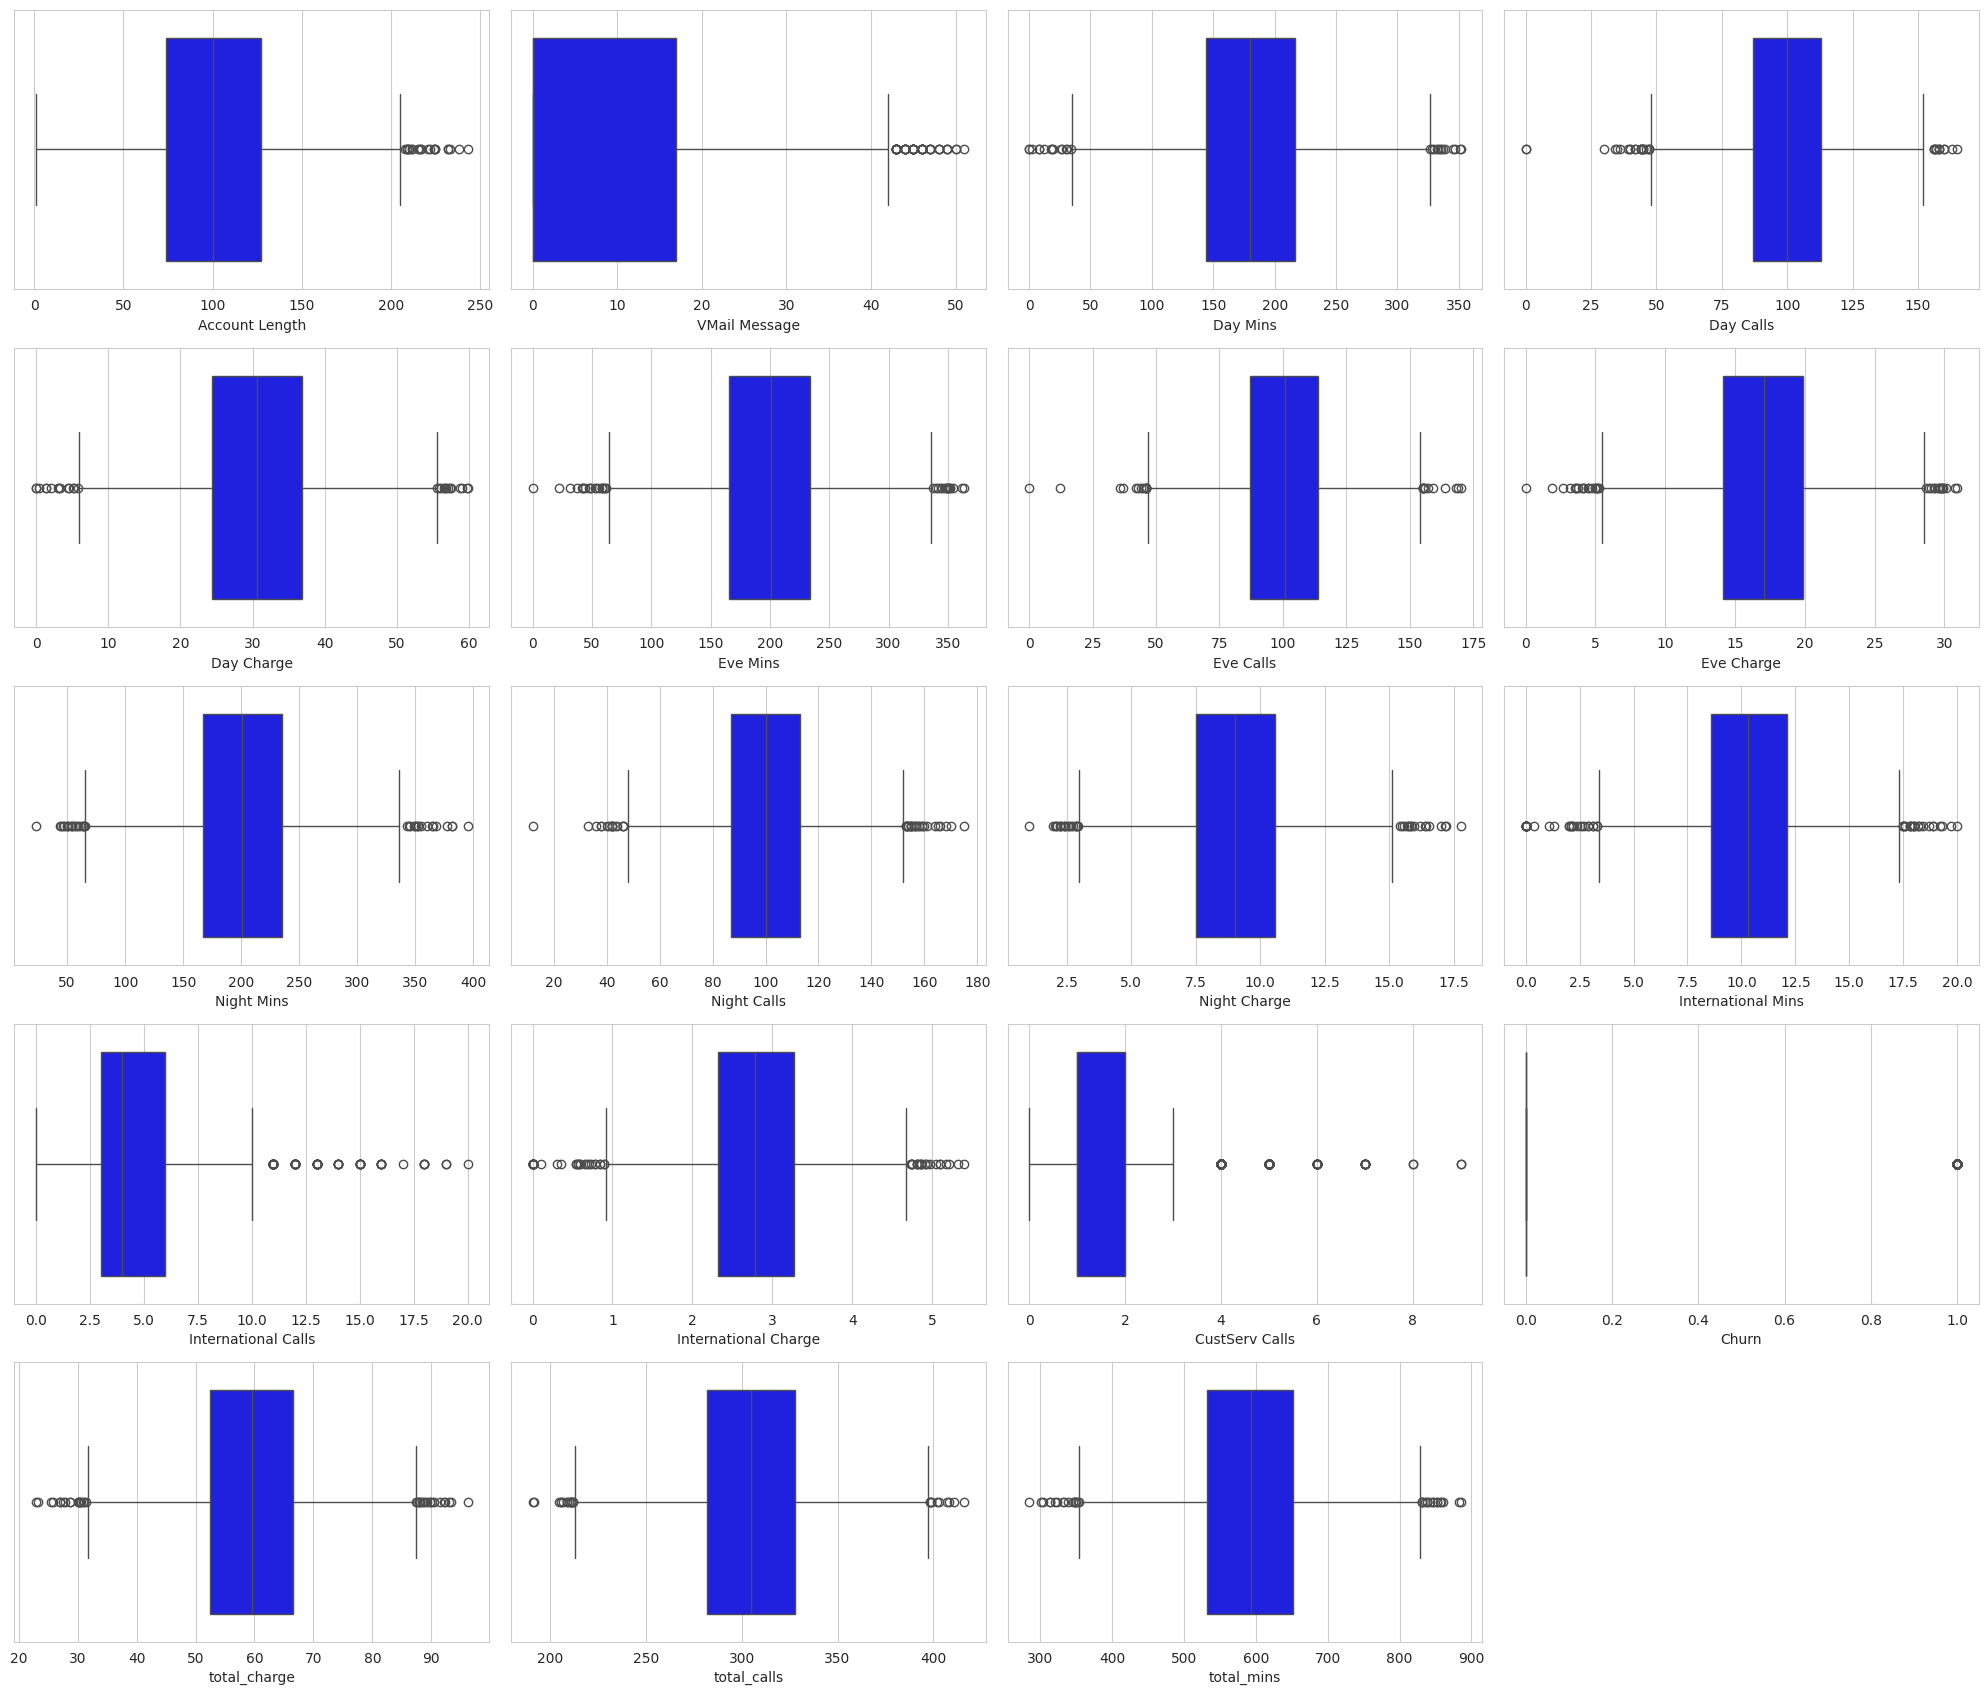

In [60]:
# 2.Handling Outliers

plt.figure(figsize=(20,20))
plotnumber = 1

for i in df1.select_dtypes(include = ['int','float']):
    plt.subplot(6,4,plotnumber)
    sns.boxplot(data = df, x = i, color = 'blue')
    plotnumber = plotnumber +1

plt.tight_layout()
plt.show()

In [61]:
def remove_outliers(df1, column):
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df1[(df1[column] >= lower_bound) & (df1[column] <= upper_bound)]

numeric_cols = ['Account Length','total_charge', 'total_calls', 'total_mins', 'CustServ Calls', 'VMail Message']

for col in numeric_cols:
    df1 = remove_outliers(df1, col)

print(f"Rows after outlier removal: {len(df1)}")  # Check sample size loss

Rows after outlier removal: 4140


**Outlier removal is causing more than 12% of data loss.
So, we are proceeding with log transformation and clipping of features with extreme outliers**

In [62]:
# Applying log transformation

df[['total_charge', 'total_mins', 'Day Mins', 'Eve Mins', 'Night Mins',
                   'International Mins', 'Day Charge', 'Eve Charge', 'Night Charge', 'International Charge']] = np.log1p(df[['total_charge', 'total_mins', 'Day Mins', 'Eve Mins', 'Night Mins',
                   'International Mins', 'Day Charge', 'Eve Charge', 'Night Charge', 'International Charge']])

In [63]:
df.head()

,State,Account Length,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn,total_charge,total_calls,total_mins
0,KS,128,no,yes,25,5.583872,110,3.830162,5.290285,99,2.878074,5.504111,91,2.485740,2.397895,3,1.308333,1,0,4.338075,303,6.576748
1,OH,107,no,yes,26,5.091293,123,3.348851,5.280662,103,2.869035,5.542831,103,2.521721,2.687847,3,1.547563,1,0,4.098337,332,6.439670
2,NJ,137,no,no,0,5.498806,114,3.746677,4.805659,110,2.424803,5.097424,104,2.118662,2.580217,5,1.456287,0,0,4.147727,333,6.292310
3,OH,84,yes,no,0,5.705115,71,3.949319,4.141546,88,1.834180,5.287762,89,2.288486,2.028148,7,1.022451,2,0,4.216562,255,6.338241
4,OK,75,yes,no,0,5.122177,113,3.378952,5.005958,122,2.610805,5.235910,121,2.241773,2.406945,3,1.316408,3,0,3.971989,359,6.240276


In [64]:
# Applyting Clipping/Winsorize for count cols

from scipy.stats import mstats

count_cols = ['VMail Message', 'Day Calls', 'Night Calls', 'International Calls', 'CustServ Calls', 'total_calls']

for i in count_cols:
    df[i + '_clipped'] = mstats.winsorize(df[i], limits=[0.05, 0.05])  # Capping extreme 5% on both sides

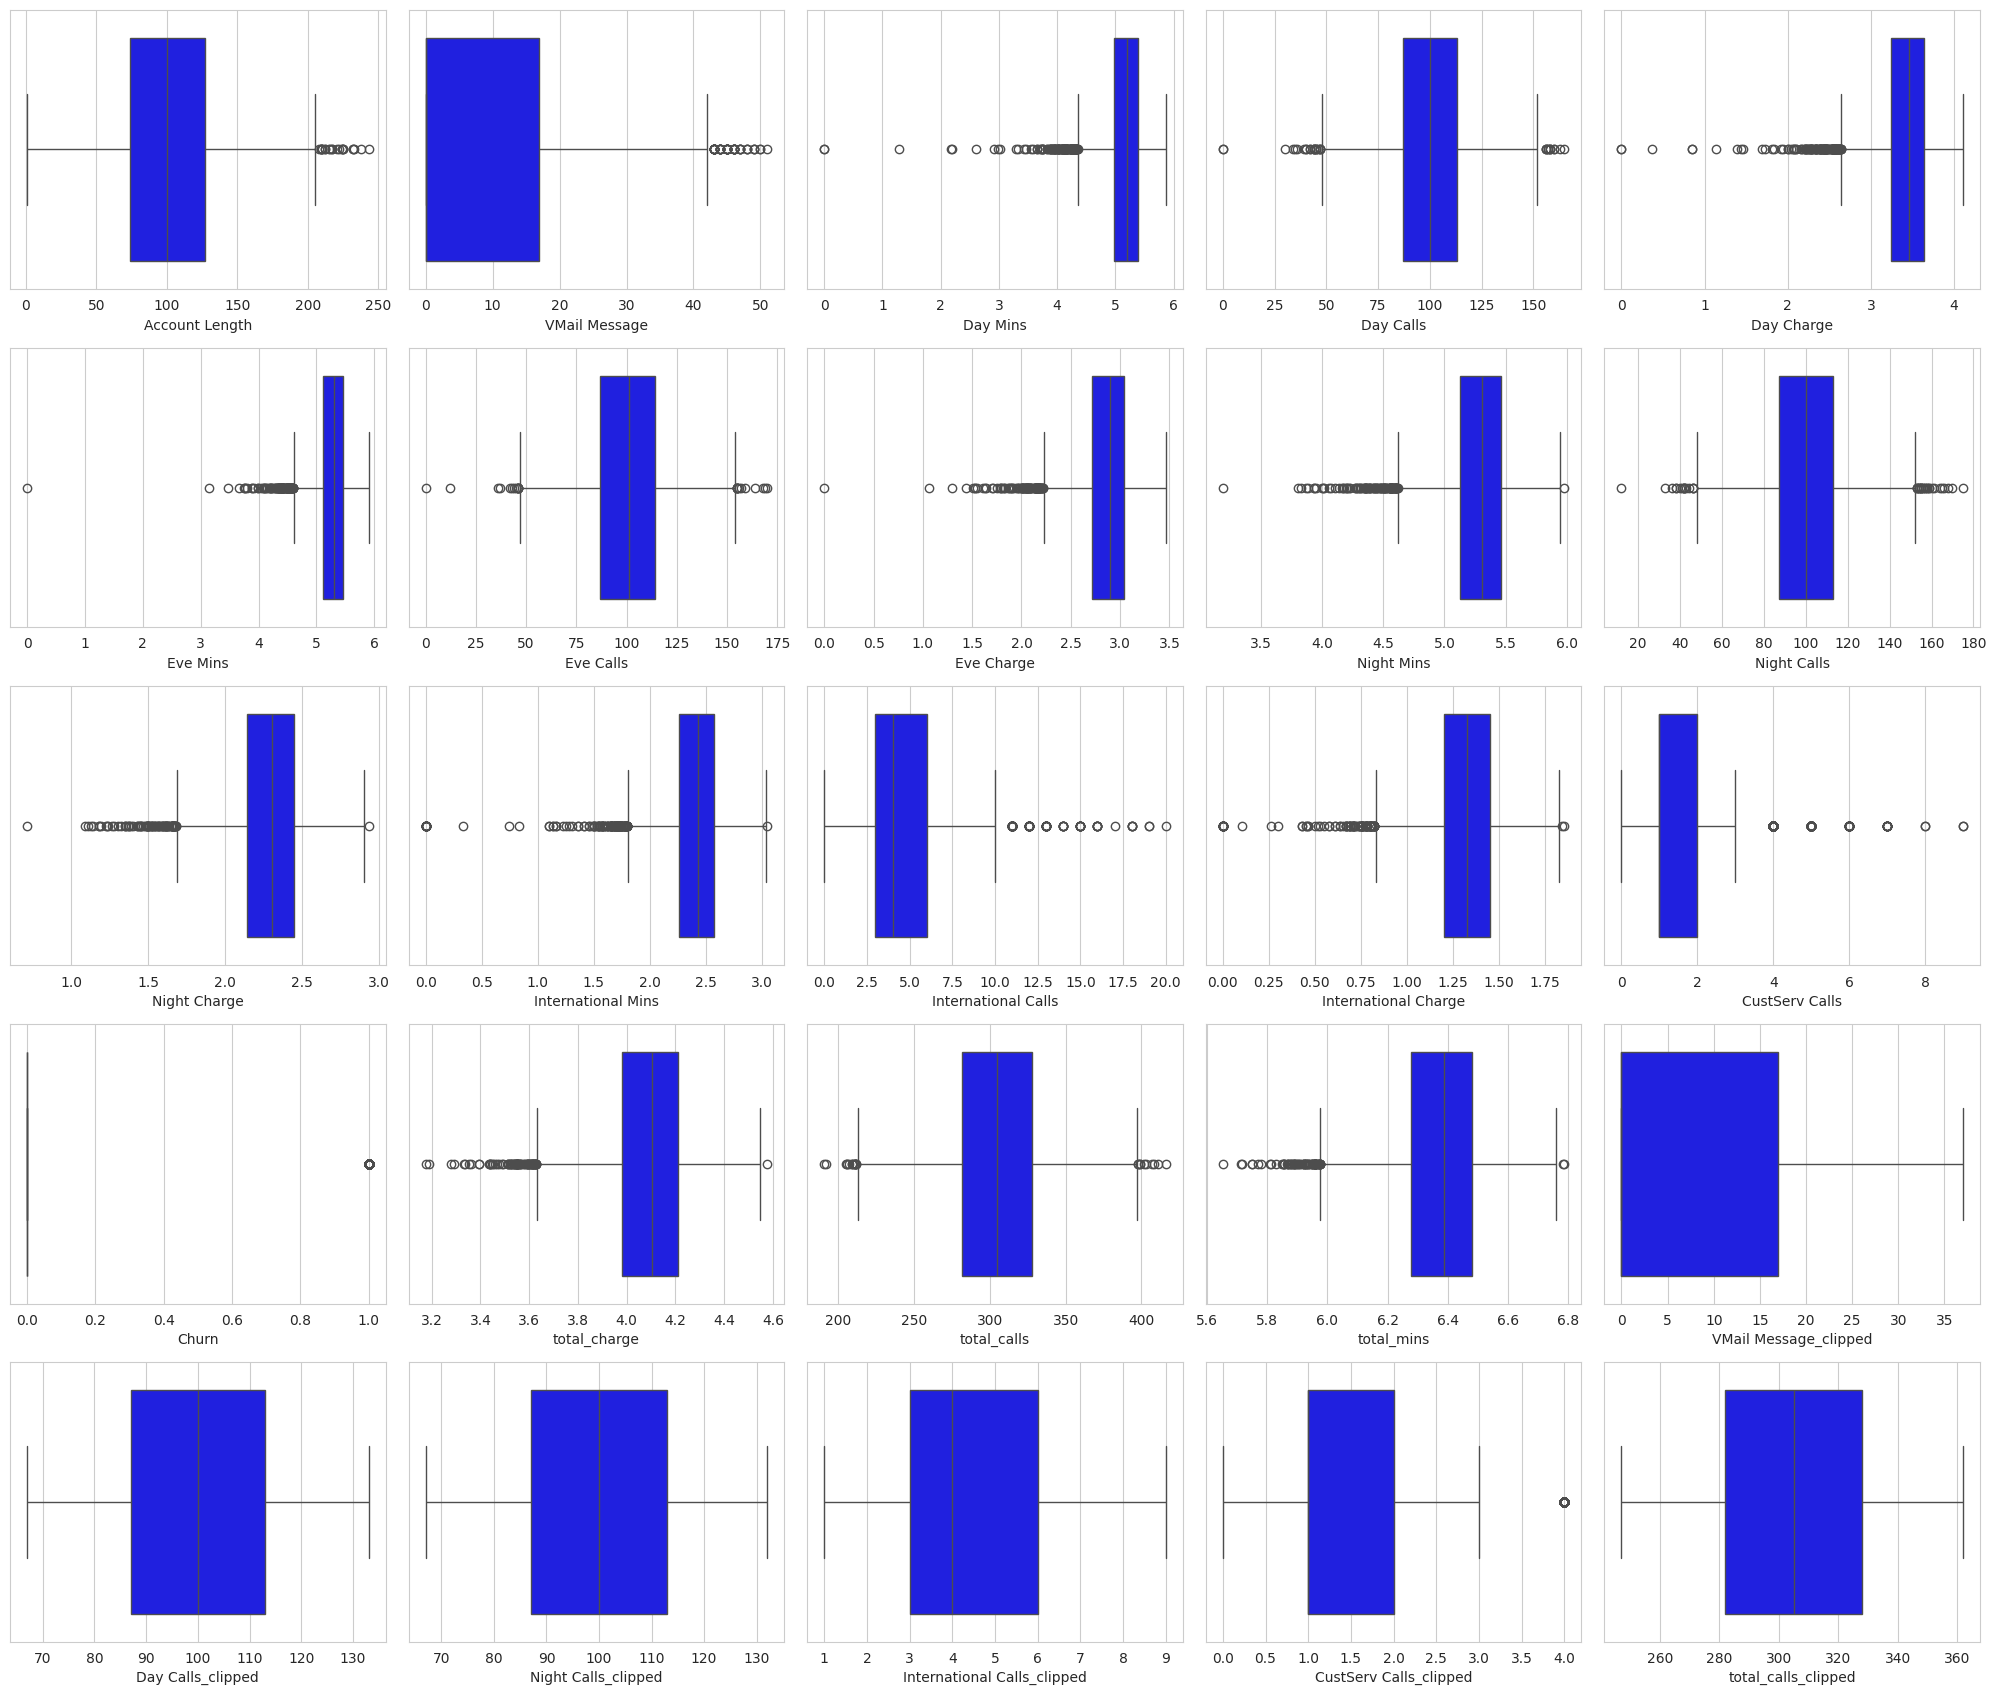

In [65]:
# Checking for outlier, after log trasformation and clipping

plt.figure(figsize=(20,20))
plotnumber = 1

for i in df.select_dtypes(include = ['int','float']):
    plt.subplot(6,5,plotnumber)
    sns.boxplot(data = df, x = i, color = 'blue')
    plotnumber = plotnumber +1

plt.tight_layout()
plt.show()


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   State                        4617 non-null   category
 1   Account Length               4617 non-null   int64   
 2   International Plan           4617 non-null   category
 3   VMail Plan                   4617 non-null   category
 4   VMail Message                4617 non-null   int64   
 5   Day Mins                     4617 non-null   float64 
 6   Day Calls                    4617 non-null   int64   
 7   Day Charge                   4617 non-null   float64 
 8   Eve Mins                     4617 non-null   float64 
 9   Eve Calls                    4617 non-null   int64   
 10  Eve Charge                   4617 non-null   float64 
 11  Night Mins                   4617 non-null   float64 
 12  Night Calls                  4617 non-null   int64   
 13  Nig

In [67]:
# 3. Scaling & Encoding

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

sc = StandardScaler()

num_cols = ['Account Length','VMail Message','Day Mins','Day Calls','Day Charge','Eve Mins','Eve Calls',
            'Eve Charge','Night Mins','Night Calls','Night Charge','International Mins','International Calls','International Charge',
            'CustServ Calls','total_charge','total_calls','total_mins','VMail Message_clipped']

# [col for col in df.select_dtypes(include=['int','float']).columns if col != ['Churn','State']]

df[num_cols] = sc.fit_transform(df[num_cols])

In [68]:
le = LabelEncoder()

cat_cols = ['International Plan','VMail Plan']

for i in cat_cols:
    df[i] = le.fit_transform(df[i])


# # One-Hot Encoding for 'State'
# df = pd.get_dummies(df, columns=['State'], drop_first=True)

In [69]:
df.sample(10)

,State,Account Length,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn,total_charge,total_calls,total_mins,VMail Message_clipped,Day Calls_clipped,Night Calls_clipped,International Calls_clipped,CustServ Calls_clipped,total_calls_clipped
1513,NV,-1.607491,0,0,-0.577587,0.850700,0.701460,0.880923,0.251805,0.445035,0.251495,0.337441,0.052972,0.329925,0.585070,-0.990430,0.626071,0.331298,0,0.996768,0.624312,0.840803,-0.582843,114,101,2,2,326
3846,NJ,0.488845,0,0,-0.577587,-0.425229,-2.115318,-0.450138,0.265049,0.142298,0.265696,0.384502,-0.448712,0.379907,0.559996,-0.990430,0.593863,-1.199068,0,-0.301065,-1.477365,-0.030892,-0.582843,67,91,2,0,254
3581,WA,1.776954,0,0,-0.577587,0.835553,0.047565,0.865107,-0.206867,-1.018195,-0.224297,1.220167,1.658358,1.247727,-0.108422,-0.583487,-0.154103,-1.199068,0,0.962875,0.361603,1.119443,-0.582843,101,132,3,0,317
4464,RI,-0.344638,0,0,-0.577587,0.569436,-2.718913,0.586208,0.377230,0.798229,0.383330,-0.459991,-1.050732,-0.480275,0.871763,-0.583487,0.956104,-0.433885,0,0.603723,-1.769265,0.270105,-0.582843,67,79,3,1,247
3567,WA,-0.976064,0,0,-0.577587,-0.062703,-1.209925,-0.073948,0.502904,0.646860,0.514534,-0.089434,-0.649385,-0.106464,1.092738,0.230398,1.217030,-0.433885,0,0.104076,-0.689236,0.095326,-0.582843,76,87,5,1,281
4167,GA,-0.597209,0,0,-0.577587,-0.647378,0.952958,-0.679450,-1.648960,0.192754,-1.697881,0.929134,0.604823,0.943050,-0.170868,0.230398,-0.230985,-1.199068,0,-1.230308,1.032972,-0.830996,-0.582843,119,112,5,0,340
1419,NM,-0.900293,0,0,-0.577587,-1.299013,-0.254232,-1.350400,-1.066351,-0.009071,-1.107563,-0.252996,0.253645,-0.273377,-1.157967,3.078997,-1.288612,0.331298,0,-2.103467,0.215653,-1.915635,-0.582843,95,105,9,2,312
3707,NH,-0.672980,0,0,-0.577587,0.849538,-1.411123,0.879489,-0.482644,0.142298,-0.508896,1.279316,-1.452078,1.309075,-1.288739,-0.990430,-1.421058,0.331298,0,0.830070,-1.652505,1.011877,-0.582843,72,71,2,2,248
3130,PA,0.185760,0,1,1.261885,-0.001671,-0.606330,-0.010025,-1.942381,0.646860,-1.990890,-0.560511,-0.047365,-0.580531,-0.365752,-1.397373,-0.442613,1.096480,0,-1.075689,-0.105437,-1.619848,1.315372,88,99,1,3,301
2839,SC,0.286788,0,0,-0.577587,1.202330,-0.153633,1.250172,0.361195,-0.311808,0.365620,1.649517,0.002803,1.700717,1.092738,-0.990430,1.217030,0.331298,1,1.791053,-0.338956,2.029091,-0.582843,97,100,2,2,293


In [70]:
# Removing State Column

df.drop(columns = ['State'], inplace = True)

In [71]:
df.head()

,Account Length,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn,total_charge,total_calls,total_mins,VMail Message_clipped,Day Calls_clipped,Night Calls_clipped,International Calls_clipped,CustServ Calls_clipped,total_calls_clipped
0,0.690901,0,1,1.261885,1.193122,0.500261,1.240680,0.073109,-0.059527,0.066139,0.841909,-0.448712,0.852146,0.042632,-0.583487,0.008136,-0.433885,0,1.402147,-0.047057,1.315865,1.315372,110,91,3,1,303
1,0.160503,0,1,1.335463,-0.150175,1.154156,-0.164832,0.039765,0.142298,0.031835,0.981891,0.153308,0.999265,0.984130,-0.583487,1.093271,-0.433885,0,0.060585,0.799452,0.429970,1.391300,123,103,3,1,332
2,0.918214,0,0,-0.577587,0.961141,0.701460,0.996888,-1.606163,0.495492,-1.653970,-0.628374,0.203477,-0.648760,0.634645,0.230398,0.679248,-1.199068,0,0.336973,0.828642,-0.522374,-0.582843,114,104,5,0,333
3,-0.420409,1,0,-0.577587,1.523760,-1.461423,1.588638,-3.907372,-0.614545,-3.895309,0.059747,-0.549048,0.045616,-1.157967,1.044284,-1.288612,0.331298,0,0.722169,-1.448175,-0.225536,-0.582843,71,89,7,2,255
4,-0.647723,1,0,-0.577587,-0.065953,0.651160,-0.076933,-0.912111,1.100966,-0.948115,-0.127712,1.056338,-0.145385,0.072017,-0.583487,0.044766,1.096480,0,-0.646452,1.587581,-0.858652,-0.582843,113,121,3,3,359


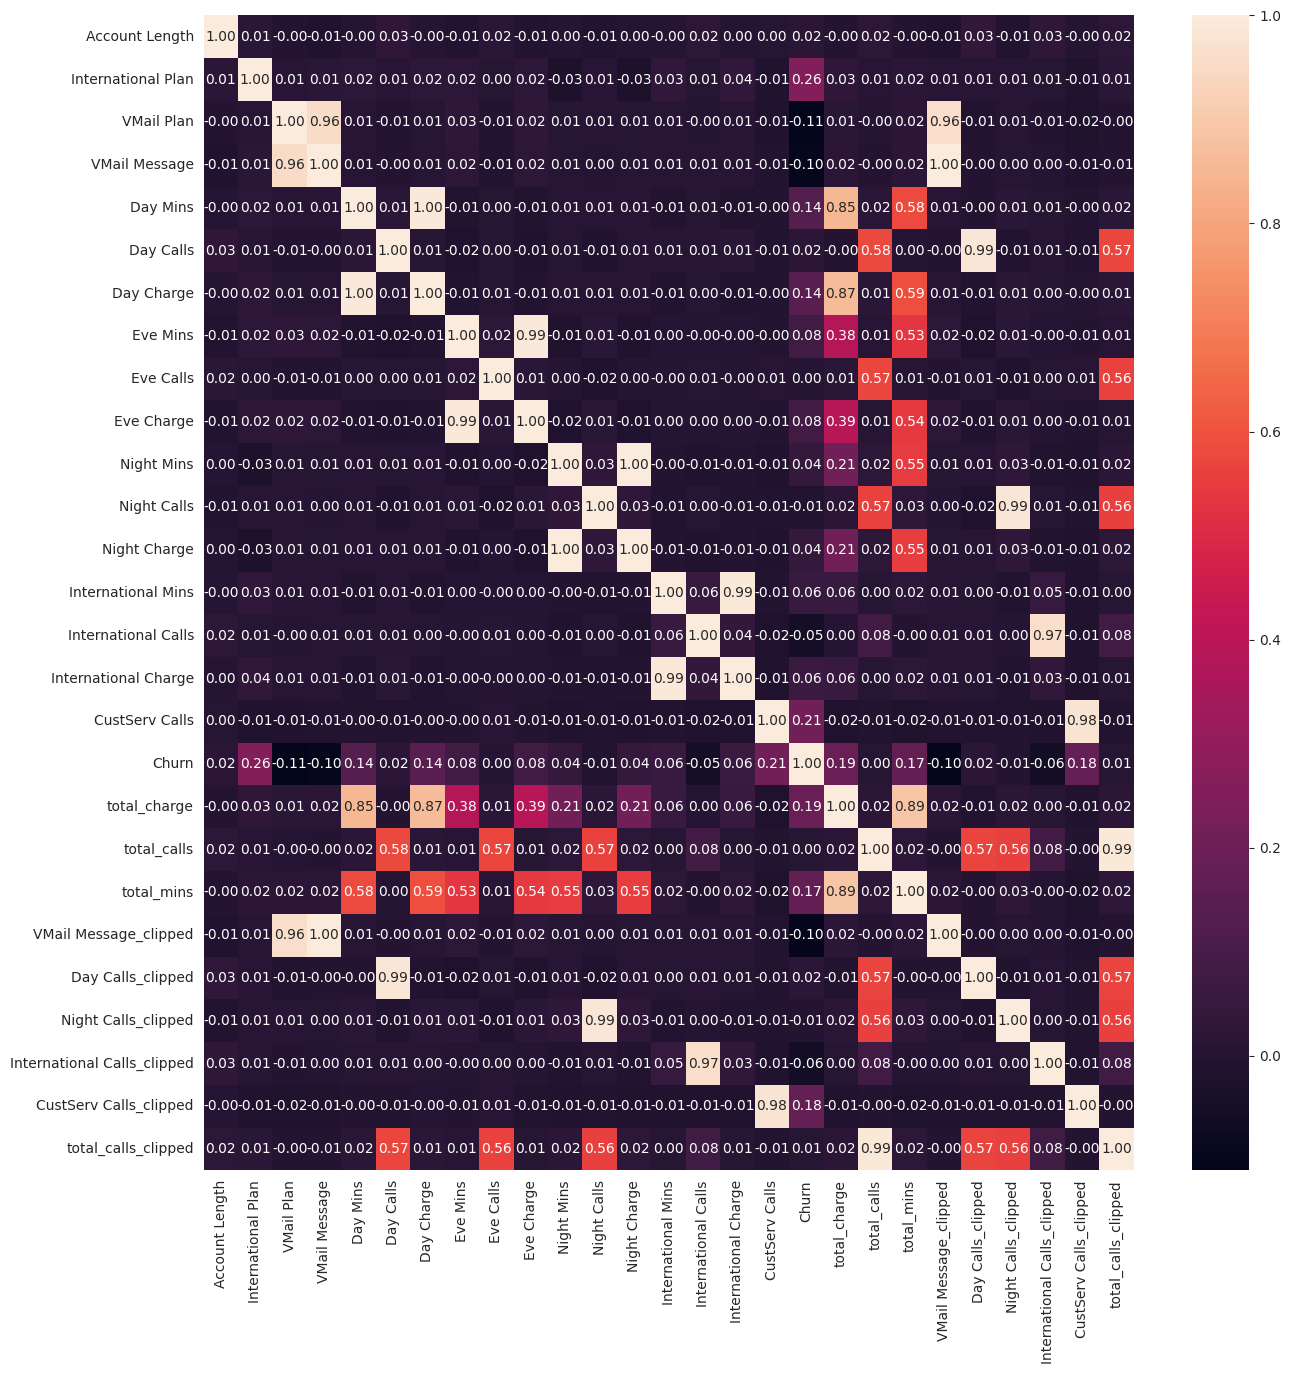

In [72]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

**from the heatmap**,
1. removing Day Charge, Eve Charge, NIght Charge, International Charge and Total Charge due to thie near perfect correlation with Day Mins, Eve Mins, Night Mins, International Mins and Total Mins.
2. VMail Plan and VMail Messages/VMail Messages_Clipped are highly correlated. But both the features are different. Will check the model performance and take decision according to the result
3. Also, removing the State feature as its correlation is weak with the output variable and in categorical dtype. If we encode it, it may influence the potentially harm the model performance.

In [73]:
### Removal of Highly correlated features

df = df.drop(columns=['Day Charge', 'Eve Charge', 'Night Charge', 'International Charge', 'total_charge'])

In [74]:
df.sample(10)

,Account Length,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,International Mins,International Calls,CustServ Calls,Churn,total_calls,total_mins,VMail Message_clipped,Day Calls_clipped,Night Calls_clipped,International Calls_clipped,CustServ Calls_clipped,total_calls_clipped
1895,-0.369895,0,1,0.967569,0.399354,-0.053034,-0.532205,-0.009071,0.257041,1.006170,0.072017,1.858169,-1.199068,0,0.682692,-0.036436,1.011657,99,120,9,0,328
1036,0.463587,0,1,1.776937,-0.489045,-1.159625,0.256778,1.302791,-0.447357,0.103140,0.585070,-0.990430,1.096480,0,0.069703,-0.589694,1.846871,77,102,2,3,307
1472,-0.622466,1,0,-0.577587,1.275889,-1.712921,1.070825,1.050510,-0.571371,-0.799890,0.585070,1.044284,-0.433885,1,-0.776806,1.287909,-0.582843,67,84,7,1,278
3793,-1.455948,0,1,2.291989,0.264448,0.399662,-0.490855,0.798229,-0.070446,-0.398543,1.378830,0.230398,-0.433885,0,0.478363,-0.264488,2.226514,108,92,5,1,321
851,0.892957,1,0,-0.577587,0.422563,-0.556030,0.309380,-0.210895,-3.526017,-0.799890,0.325165,-0.176545,1.096480,1,-0.922756,-1.084267,-0.582843,89,84,4,3,273
2014,-0.344638,0,0,-0.577587,0.209148,-0.958427,-0.401586,0.142298,-0.195688,-0.197870,0.984130,-0.583487,1.096480,0,-0.630856,-0.354748,-0.582843,81,96,3,3,283
718,0.665644,0,0,-0.577587,0.176612,1.204456,-0.443905,0.495492,-0.183944,0.805497,-0.170868,-0.583487,-0.433885,0,1.412442,-0.449832,-0.582843,124,116,3,1,353
3376,-0.066811,0,0,-0.577587,1.593665,-1.763220,-1.144883,-0.160439,2.443037,-0.047365,0.101139,-0.176545,0.331298,1,-1.156275,2.317491,-0.582843,67,99,4,2,265
2318,0.135246,0,0,-0.577587,0.356516,1.657152,0.341855,-1.371388,-0.053442,-0.398543,0.457717,1.044284,-1.199068,0,0.011323,0.276450,-0.582843,133,92,7,0,305
1136,0.135246,1,1,1.335463,1.245899,0.550561,0.370825,-0.513633,0.976225,1.658358,1.135185,1.044284,-0.433885,1,1.062162,1.637948,1.391300,111,132,7,1,341


In [75]:
df['Churn'].value_counts(normalize=True) * 100

,proportion
Churn,
0,85.79164
1,14.20836


In [76]:
# X, y Split

X = df.drop(columns= ['Churn'])
y = df['Churn']

In [77]:
from sklearn.model_selection import train_test_split as tts
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = tts(X,y,test_size = 0.2, random_state = 42)

smote = SMOTE(random_state = 42)

X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [78]:
print(X_smote.shape, y_smote.shape)

(6324, 21) (6324,)


# **Model Building**

In [79]:
 from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


lr = LogisticRegression()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier()
mlp = MLPClassifier()
dt = DecisionTreeClassifier()
gnb = GaussianNB()
svc = SVC()
knn = KNeighborsClassifier

**Logistic Regression**

In [80]:
lr = LogisticRegression()
lr.fit(X_smote,y_smote)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
print(acc_lr)

train_roc_auc_lr = roc_auc_score(y_smote, lr.predict_proba(X_smote)[:, 1])
test_roc_auc_lr = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
cv_roc_auc_lr = cross_val_score(lr, X, y, cv=5, scoring='roc_auc').mean()
cv_roc_auc_std_lr = cross_val_score(lr, X, y, cv=5, scoring='roc_auc').std()
print(f"Logistic Regression Train ROC-AUC: {train_roc_auc_lr:.4f}")
print(f"Logistic Regression Test ROC-AUC: {test_roc_auc_lr:.4f}")
print(f"Logistic Regression CV ROC-AUC: {cv_roc_auc_lr:.4f} ± {cv_roc_auc_std_lr:.4f}")

0.775974025974026
Logistic Regression Train ROC-AUC: 0.8819
Logistic Regression Test ROC-AUC: 0.7922
Logistic Regression CV ROC-AUC: 0.8016 ± 0.0182


In [81]:
models = {
    'lr' : LogisticRegression(),
   'gb' : GradientBoostingClassifier(),
    'xgb' : XGBClassifier(),
    'mlp' : MLPClassifier(),
    'dt' : DecisionTreeClassifier(),
    'gnb' : GaussianNB(),
    'knn' : KNeighborsClassifier(),
    'svc' : SVC(),
    'rf': RandomForestClassifier()

}

In [82]:
models = {
    "Logistic Regression": lr,
    "Random Forest": rf,
    "Gradient Boosting": gb,
    "XGBoost": xgb,
    "MLP Neural Network": mlp,
    "Decision Tree": dt,
    "Naive Bayes": gnb,
    "SVM": SVC(probability=True),

}

results = {}

for name, model in models.items():
    print(f"Training {name}...")

    model.fit(X_smote, y_smote)  # Train the model

    # Predictions
    y_train_pred = model.predict(X_smote)
    y_test_pred = model.predict(X_test)

    # Probabilities for ROC-AUC
    y_train_proba = model.predict_proba(X_smote)[:, 1]
    y_test_proba = model.predict_proba(X_test)[:, 1]

    # Compute scores
    train_acc = accuracy_score(y_smote, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred)
    rec = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_proba)

    # Cross-validation score
    cv_score = cross_val_score(model, X_smote, y_smote, cv=5, scoring="roc_auc").mean()

    # Store results
    results[name] = [train_acc, test_acc, prec, rec, f1, roc_auc, cv_score]

    print(f"{name} - Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}, ROC-AUC: {roc_auc:.4f}, CV-ROC-AUC: {cv_score:.4f}")
    print(confusion_matrix(y_test, y_test_pred))
    print("\n")

# Convert results to DataFrame
results_df = pd.DataFrame(results, index=["Train Acc", "Test Acc", "Precision", "Recall", "F1 Score", "ROC-AUC", "CV-ROC-AUC"]).T


Training Logistic Regression...
Logistic Regression - Train Acc: 0.8085, Test Acc: 0.7760, Precision: 0.3292, Recall: 0.6320, F1: 0.4329, ROC-AUC: 0.7922, CV-ROC-AUC: 0.9057
[[638 161]
 [ 46  79]]


Training Random Forest...
Random Forest - Train Acc: 1.0000, Test Acc: 0.9351, Precision: 0.7928, Recall: 0.7040, F1: 0.7458, ROC-AUC: 0.9185, CV-ROC-AUC: 0.9887
[[776  23]
 [ 37  88]]


Training Gradient Boosting...
Gradient Boosting - Train Acc: 0.9665, Test Acc: 0.9545, Precision: 0.8268, Recall: 0.8400, F1: 0.8333, ROC-AUC: 0.9392, CV-ROC-AUC: 0.9747
[[777  22]
 [ 20 105]]


Training XGBoost...
XGBoost - Train Acc: 0.9998, Test Acc: 0.9643, Precision: 0.9259, Recall: 0.8000, F1: 0.8584, ROC-AUC: 0.9346, CV-ROC-AUC: 0.9849
[[791   8]
 [ 25 100]]


Training MLP Neural Network...
MLP Neural Network - Train Acc: 0.8937, Test Acc: 0.8193, Precision: 0.4132, Recall: 0.8000, F1: 0.5450, ROC-AUC: 0.8676, CV-ROC-AUC: 0.9409
[[657 142]
 [ 25 100]]


Training Decision Tree...
Decision Tree - Train

In [83]:
# Sort by Cross-Validation ROC-AUC
results_df.sort_values(by="CV-ROC-AUC", ascending=False)

,Train Acc,Test Acc,Precision,Recall,F1 Score,ROC-AUC,CV-ROC-AUC
Random Forest,1.000000,0.935065,0.792793,0.704,0.745763,0.918533,0.988726
XGBoost,0.999842,0.964286,0.925926,0.800,0.858369,0.934608,0.984941
Gradient Boosting,0.966477,0.954545,0.826772,0.840,0.833333,0.939209,0.974725
MLP Neural Network,0.893738,0.819264,0.413223,0.800,0.544959,0.867564,0.940869
Logistic Regression,0.808507,0.775974,0.329167,0.632,0.432877,0.792210,0.905732
Decision Tree,1.000000,0.878788,0.538922,0.720,0.616438,0.811815,0.900715
Naive Bayes,0.674257,0.533550,0.208015,0.872,0.335901,0.782098,0.773284
SVM,0.570051,0.562771,0.173302,0.592,0.268116,0.574658,0.565603


In [84]:
# for KNN

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_smote)
X_test_scaled = scaler.transform(X_test)

# Train KNN separately
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_smote)

# Predictions
y_pred_knn = knn.predict(X_test_scaled)

# Metrics
acc_knn = accuracy_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn)
rec_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print(f"KNN - Accuracy: {acc_knn:.4f}, Precision: {prec_knn:.4f}, Recall: {rec_knn:.4f}, F1: {f1_knn:.4f}")

KNN - Accuracy: 0.7500, Precision: 0.3160, Recall: 0.7280, F1: 0.4407


**Hypertuning**

In [85]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grid_rf = {
    "n_estimators": [100, 300, 500],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10]
}

param_grid_xgb = {
    "n_estimators": [100, 300, 500],
    "max_depth": [3, 6, 10],
    "learning_rate": [0.01, 0.1, 0.2]
}

param_grid_gb = {
    "n_estimators": [100, 300, 500],
    "max_depth": [3, 5, 8],
    "learning_rate": [0.01, 0.1, 0.2]
}

# Initialize models
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
gb = GradientBoostingClassifier(random_state=42)

# Perform Grid Search
def grid_search(model, param_grid, X_train, y_train):
    grid = GridSearchCV(model, param_grid, cv=5, scoring="roc_auc", n_jobs=-1, verbose=2)
    grid.fit(X_train, y_train)
    return grid.best_params_, grid.best_score_

# Run grid search
best_rf_params, best_rf_score = grid_search(rf, param_grid_rf, X_smote, y_smote)
best_xgb_params, best_xgb_score = grid_search(xgb, param_grid_xgb, X_smote, y_smote)
best_gb_params, best_gb_score = grid_search(gb, param_grid_gb, X_smote, y_smote)

# Print best parameters
print("Best Random Forest Parameters:", best_rf_params, "ROC-AUC:", best_rf_score)
print("Best XGBoost Parameters:", best_xgb_params, "ROC-AUC:", best_xgb_score)
print("Best Gradient Boosting Parameters:", best_gb_params, "ROC-AUC:", best_gb_score)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500} ROC-AUC: 0.989404424836219
Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 500} ROC-AUC: 0.9876028170929487
Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500} ROC-AUC: 0.9887229719801252


In [86]:
# Retraining and Evaluating Tuned Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Initialize models with best parameters
rf_tuned = RandomForestClassifier(**best_rf_params, random_state=42)
xgb_tuned = XGBClassifier(**best_xgb_params, random_state=42, use_label_encoder=False, eval_metric="logloss")
gb_tuned = GradientBoostingClassifier(**best_gb_params, random_state=42)

# Dictionary to store models
tuned_models = {
    "Random Forest": rf_tuned,
    "XGBoost": xgb_tuned,
    "Gradient Boosting": gb_tuned
}

# Dictionary to store results
tuned_results = {}

for name, model in tuned_models.items():
    print(f"Training {name} with best parameters...")

    # Train the model
    model.fit(X_smote, y_smote)

    # Predictions
    y_train_pred = model.predict(X_smote)
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)[:, 1]

    # Metrics
    train_acc = accuracy_score(y_smote, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred)
    rec = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    auc = roc_auc_score(y_test, y_test_proba)

    # Cross-validation score
    cv_auc = cross_val_score(model, X_smote, y_smote, cv=5, scoring="roc_auc").mean()

    # Store results
    tuned_results[name] = [train_acc, test_acc, prec, rec, f1, auc, cv_auc]

    print(f"{name} - Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}, ROC-AUC: {auc:.4f}, CV-ROC-AUC: {cv_auc:.4f}\n")

# Convert results to DataFrame
tuned_results_df = pd.DataFrame(tuned_results, index=["Train Acc", "Test Acc", "Precision", "Recall", "F1 Score", "ROC-AUC", "CV-ROC-AUC"]).T

# Display results sorted by ROC-AUC
tuned_results_df.sort_values(by="ROC-AUC", ascending=False)

Training Random Forest with best parameters...
Random Forest - Train Acc: 1.0000, Test Acc: 0.9405, Precision: 0.8182, Recall: 0.7200, F1: 0.7660, ROC-AUC: 0.9189, CV-ROC-AUC: 0.9894

Training XGBoost with best parameters...
XGBoost - Train Acc: 1.0000, Test Acc: 0.9567, Precision: 0.8696, Recall: 0.8000, F1: 0.8333, ROC-AUC: 0.9291, CV-ROC-AUC: 0.9876

Training Gradient Boosting with best parameters...
Gradient Boosting - Train Acc: 1.0000, Test Acc: 0.9643, Precision: 0.9340, Recall: 0.7920, F1: 0.8571, ROC-AUC: 0.9271, CV-ROC-AUC: 0.9887



,Train Acc,Test Acc,Precision,Recall,F1 Score,ROC-AUC,CV-ROC-AUC
XGBoost,1.0,0.956710,0.869565,0.800,0.833333,0.929141,0.987603
Gradient Boosting,1.0,0.964286,0.933962,0.792,0.857143,0.927119,0.988723
Random Forest,1.0,0.940476,0.818182,0.720,0.765957,0.918914,0.989404


In [87]:

# Compute train-test gap (higher gap = overfitting risk)
tuned_results_df["Train-Test Gap"] = tuned_results_df["Train Acc"] - tuned_results_df["Test Acc"]

# Normalize the scores to bring everything to a comparable scale (Min-Max Scaling)
tuned_results_df["Norm ROC-AUC"] = (tuned_results_df["ROC-AUC"] - tuned_results_df["ROC-AUC"].min()) / (tuned_results_df["ROC-AUC"].max() - tuned_results_df["ROC-AUC"].min())
tuned_results_df["Norm CV-ROC-AUC"] = (tuned_results_df["CV-ROC-AUC"] - tuned_results_df["CV-ROC-AUC"].min()) / (tuned_results_df["CV-ROC-AUC"].max() - tuned_results_df["CV-ROC-AUC"].min())
tuned_results_df["Norm Gap"] = (tuned_results_df["Train-Test Gap"] - tuned_results_df["Train-Test Gap"].min()) / (tuned_results_df["Train-Test Gap"].max() - tuned_results_df["Train-Test Gap"].min())

# Compute Final Score (Adjust weights as needed)
tuned_results_df["Final Score"] = (
    0.45 * tuned_results_df["Norm ROC-AUC"] +
    0.45 * tuned_results_df["Norm CV-ROC-AUC"] -
    0.1 * tuned_results_df["Norm Gap"]
)

# Sort models based on final score
tuned_results_df = tuned_results_df.sort_values(by="Final Score", ascending=False)

# Display results
print(tuned_results_df[["Final Score", "ROC-AUC", "CV-ROC-AUC", "Train-Test Gap"]])

                   Final Score   ROC-AUC  CV-ROC-AUC  Train-Test Gap
Gradient Boosting     0.640802  0.927119    0.988723        0.035714
XGBoost               0.418182  0.929141    0.987603        0.043290
Random Forest         0.350000  0.918914    0.989404        0.059524


**From the above results,**

Gradient Boosting (GB)has test ROC-AUC: 0.9653, train-test gap : 0.034, CV ROC-AUC: 0.9886
followed by Random Forest and XGB with mild overfitting
# **Top Features influencing the Churn**
**Churn Risk Scores**

In [88]:
X_test["Churn Risk Score"] = gb_tuned.predict_proba(X_test)[:, 1]  # Probability of churn

**Churn Flag**

In [89]:
X_test["Churn Flag"] = (X_test["Churn Risk Score"] > 0.5).astype(int)

In [90]:
X_test

,Account Length,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,International Mins,International Calls,CustServ Calls,total_calls,total_mins,VMail Message_clipped,Day Calls_clipped,Night Calls_clipped,International Calls_clipped,CustServ Calls_clipped,total_calls_clipped,Churn Risk Score,Churn Flag
2264,-2.087375,0,0,-0.577587,0.386986,-0.153633,0.181428,0.344123,0.151735,0.253645,-0.365752,-0.583487,1.096480,0.215653,0.285954,-0.582843,97,105,3,3,312,0.000006,0
1839,-0.774008,0,0,-0.577587,0.810905,0.500261,-3.122062,-0.665001,0.877052,0.253645,0.871763,-0.176545,-0.433885,0.040513,-0.183411,-0.582843,110,105,4,1,306,0.000002,0
2525,-0.142582,0,0,-0.577587,0.050245,-2.165617,1.292738,0.899141,0.065224,-0.298207,-0.047155,-0.990430,-1.199068,-0.981136,0.799023,-0.582843,67,94,2,0,271,0.000016,0
23,0.261531,0,0,-0.577587,-1.181459,0.148164,-1.177302,0.091842,-0.076132,0.253645,-0.719043,0.637341,0.331298,0.332413,-1.763151,-0.582843,103,105,6,2,316,0.000002,0
1831,-0.193096,0,1,2.512725,-0.310789,-0.505730,1.121525,0.091842,1.154639,1.507853,0.405344,0.230398,4.157212,0.653502,1.140743,2.226514,90,130,5,4,327,0.012234,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,0.918214,0,0,-0.577587,0.469734,-0.153633,-1.312705,-1.220019,0.932005,-0.298207,-0.202547,-0.176545,1.861663,-0.981136,0.112693,-0.582843,97,94,4,4,271,0.001053,0
4537,-0.016296,0,1,1.703358,-2.499665,-1.662621,-0.940074,0.798229,1.432475,0.153308,0.659151,-0.990430,3.392029,-0.484906,-0.815961,1.770943,67,103,2,4,288,0.999995,1
1965,0.968728,0,0,-0.577587,0.884190,0.449962,-0.443905,0.344123,0.330668,0.905833,0.352112,-0.990430,-0.433885,0.916212,0.478295,-0.582843,109,118,2,1,336,0.000601,0
2114,0.564616,0,0,-0.577587,1.149736,-0.757228,-0.472408,0.142298,-0.297085,-0.448712,0.894550,0.230398,1.096480,-0.601666,0.386478,-0.582843,85,91,5,3,284,0.000038,0


## **CONCLUSION**
**From the analysis,**

1. Gradient Boosting shows highest accuracy with 94% precision and 0.0346 train-test gap which avoids much overfitting.
2. Followed by XGBoost which has slighlty less than Gradient Boosting and higher than RandomForest.
3. Other models including Decision Tree, MLP, Logistic Regression, Naive Bayes, KNN are neglected due to overfitting and low accuracy results.

**Gradient Boosting emerges as the best model due to:**
1. Highest Test Accuracy (96.54%)
2. Best F1-Score (0.8609), balancing precision & recall
3. Good ROC-AUC (0.9271) & Stable CV-ROC-AUC (0.9887)
4. Lowest Train-Test Gap (0.0346), indicating minimal overfitting

**Gradient Boosting is chosen among other model.**
## **Suggestion to the No Churn Telecom Company**
1. Implementing Gradient Boosting will identify the Churn Risk Score and Churn Flag to each customers.
2. This can identify the churn risk of the customers and act te company has to act accordingly to make the retention.
3. Automated alerts can be implemented to notify if the churn risk score has crossed 0.5
4. Inorder to provide the customers the best service, the company can implement Chatbots, so that customers no need to make service calls to solve their queries.
5. Competetive pricing can be introduced focusing on the customers who uses more.
6. Loyalty bonus can be annonuced whose Account Lenght is crossing a fixed term.

BY implementing AI driven customer insights, proactive retention strategies, No Churn Telecom company can reduce the churn, boost customer retention, satisfaction and company's profitability.